In [1]:
library(tidyverse)
library(magrittr)
library(here)
library(furrr)

devtools::load_all(".")

plan(multiprocess)

options(future.globals.maxSize= 1500*1024^2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  2.1.1     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract

here() starts at /mnt/expressions/mp/ychr
Loading required package: future
Loading ychr


# Estimating high-coverage Mez2-AMH divergence time

try complete.cases including ustishim

In [2]:
gt <- read_genotypes("mez2", "full", mindp = 3, maxdp = 0.99, tv_only = TRUE)

In [3]:
tafr <- calculate_tafr(gt) %>% unnest %>% summarise_if(is.numeric, mean)

In [4]:
tafr

tmrca_afr,tmrca_ad,tmrca_f,mut_rate,age,a,b,c,d,e,f,total
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
281857.9,310506.1,253209.7,4.732979e-10,45000,718.3077,0.1538462,3.461538,135.5385,10.92308,695.4615,5850750


In [5]:
calculate_direct <- function(archaic, capture, mindp) {
    gt <- read_genotypes(archaic, capture, mindp = mindp, maxdp = 0,99, tv_only = TRUE) %>%
        .[, c("chrom", "pos", "a00", "chimp", "mez2")] %>% filter(complete.cases(.))

    tibble(
        name = archaic,
        arch = sum(gt$a00 == gt$chimp & gt[[archaic]] != gt$chimp),
        hum = sum(gt[[archaic]] == gt$chimp & gt$a00 != gt$chimp),
        anc = sum(gt[[archaic]] == gt$a00 & gt$a00 != gt$chimp),
        total = nrow(gt),
        mut_rate = tafr$mut_rate,
        tmrca = hum / (total * mut_rate),
        dp = mindp
     )
}

In [6]:
direct_tmrca <- future_map_dfr(1:20, function(i) calculate_direct("mez2", "full", i))

In [7]:
direct_tmrca

name,arch,hum,anc,total,mut_rate,tmrca,dp
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
mez2,0,1,9,10,4.732979e-10,211283437,1
mez2,0,0,0,0,4.732979e-10,NaN,2
mez2,0,0,0,0,4.732979e-10,NaN,3
mez2,0,0,0,0,4.732979e-10,NaN,4
mez2,0,0,0,0,4.732979e-10,NaN,5
mez2,0,0,0,0,4.732979e-10,NaN,6
mez2,0,0,0,0,4.732979e-10,NaN,7
mez2,0,0,0,0,4.732979e-10,NaN,8
mez2,0,0,0,0,4.732979e-10,NaN,9


Warning message:
“Removed 19 rows containing missing values (geom_point).”Warning message:
“Removed 19 rows containing missing values (geom_errorbar).”

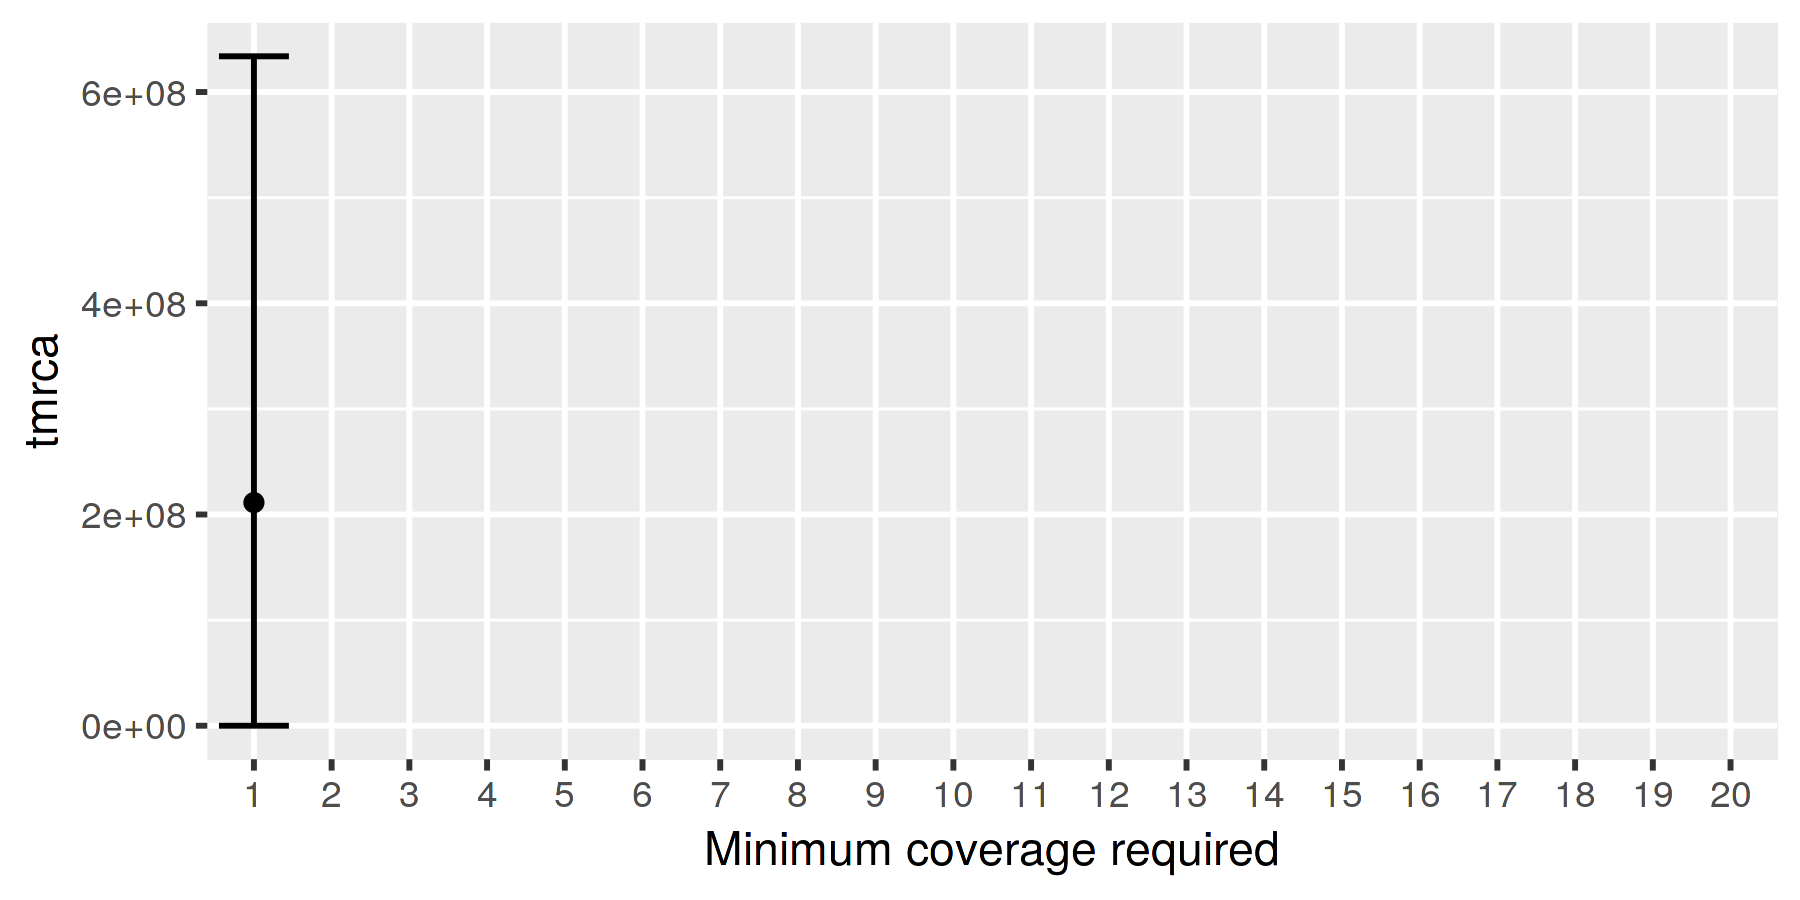

In [8]:
set_dim(6, 3)

direct_tmrca %>%
mutate(pmap(list(hum, total, mut_rate), function(hum, total, mut_rate) {
    counts <- rpois(1000, hum) / (total * mut_rate)
    ci <- quantile(counts, probs = c(0.025, 0.975), na.rm = TRUE)
    tibble(lower = ci[1], upper = ci[2])
    })) %>%
unnest %>%
ggplot(aes(as.factor(dp), tmrca)) +
    geom_point() +
    geom_errorbar(aes(ymin = lower, ymax = upper)) +
    xlab("Minimum coverage required")

Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

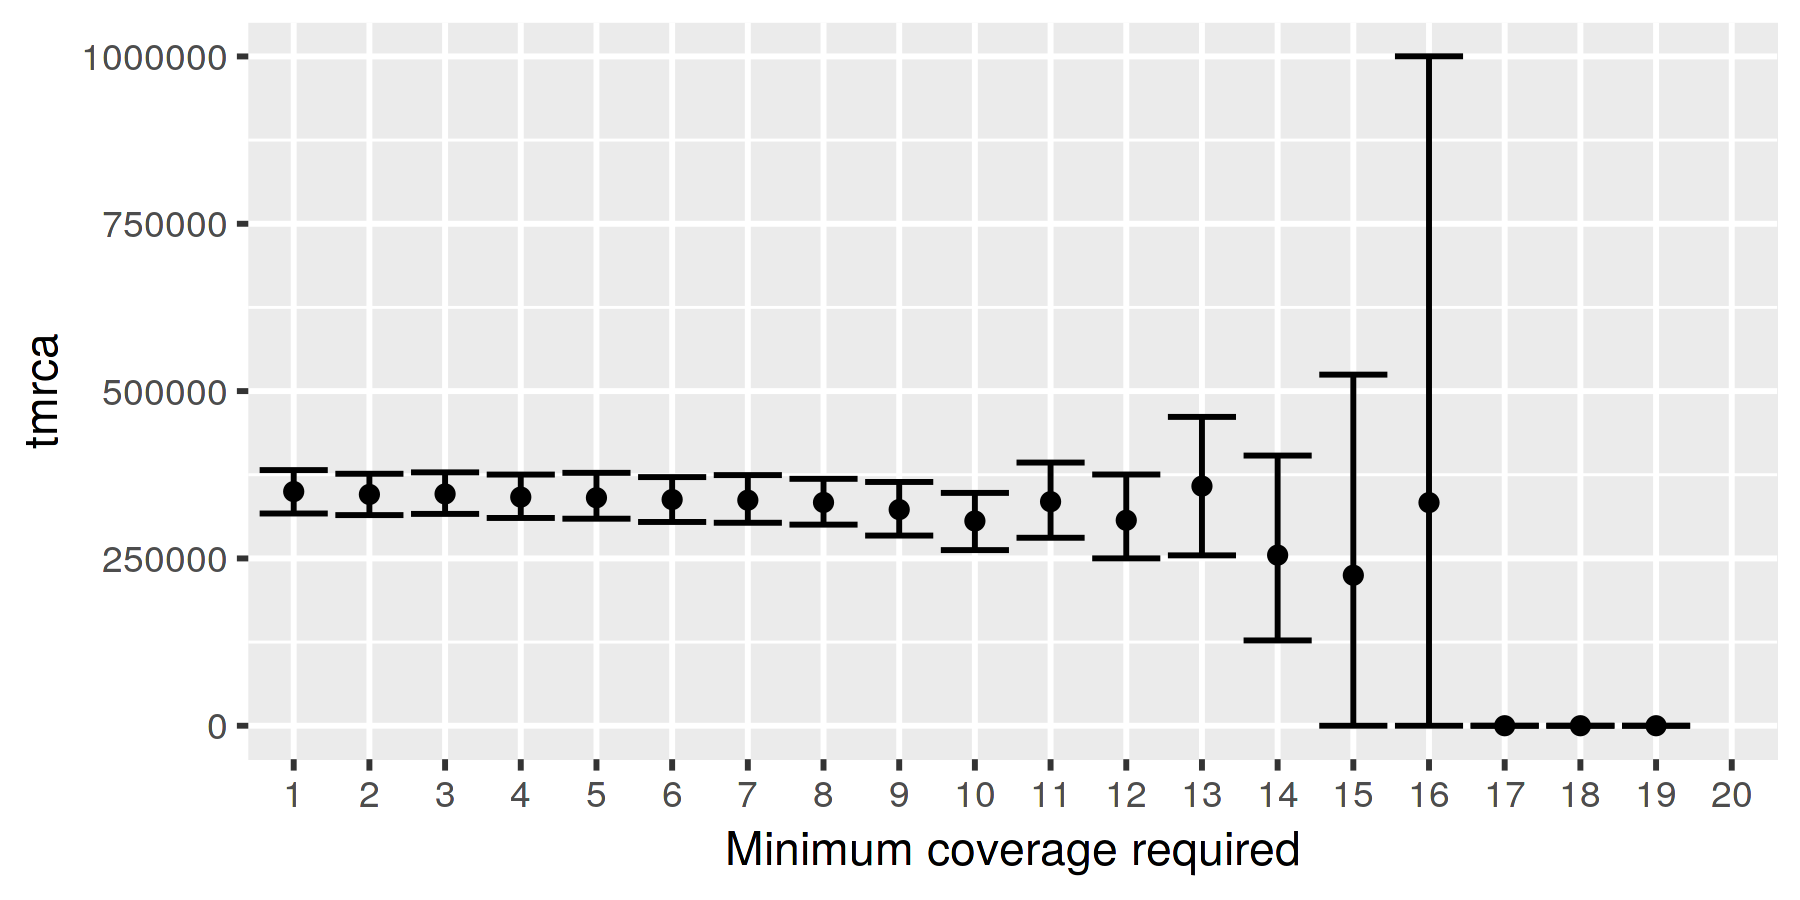

In [27]:
set_dim(6, 3)

direct_tmrca %>%
mutate(pmap(list(hum, total, mut_rate), function(hum, total, mut_rate) {
    counts <- rpois(1000, hum) / (total * mut_rate)
    ci <- quantile(counts, probs = c(0.025, 0.975), na.rm = TRUE)
    tibble(lower = ci[1], upper = ci[2])
    })) %>%
unnest %>%
ggplot(aes(as.factor(dp), tmrca)) +
    geom_point() +
    geom_errorbar(aes(ymin = lower, ymax = upper)) +
    xlab("Minimum coverage required")

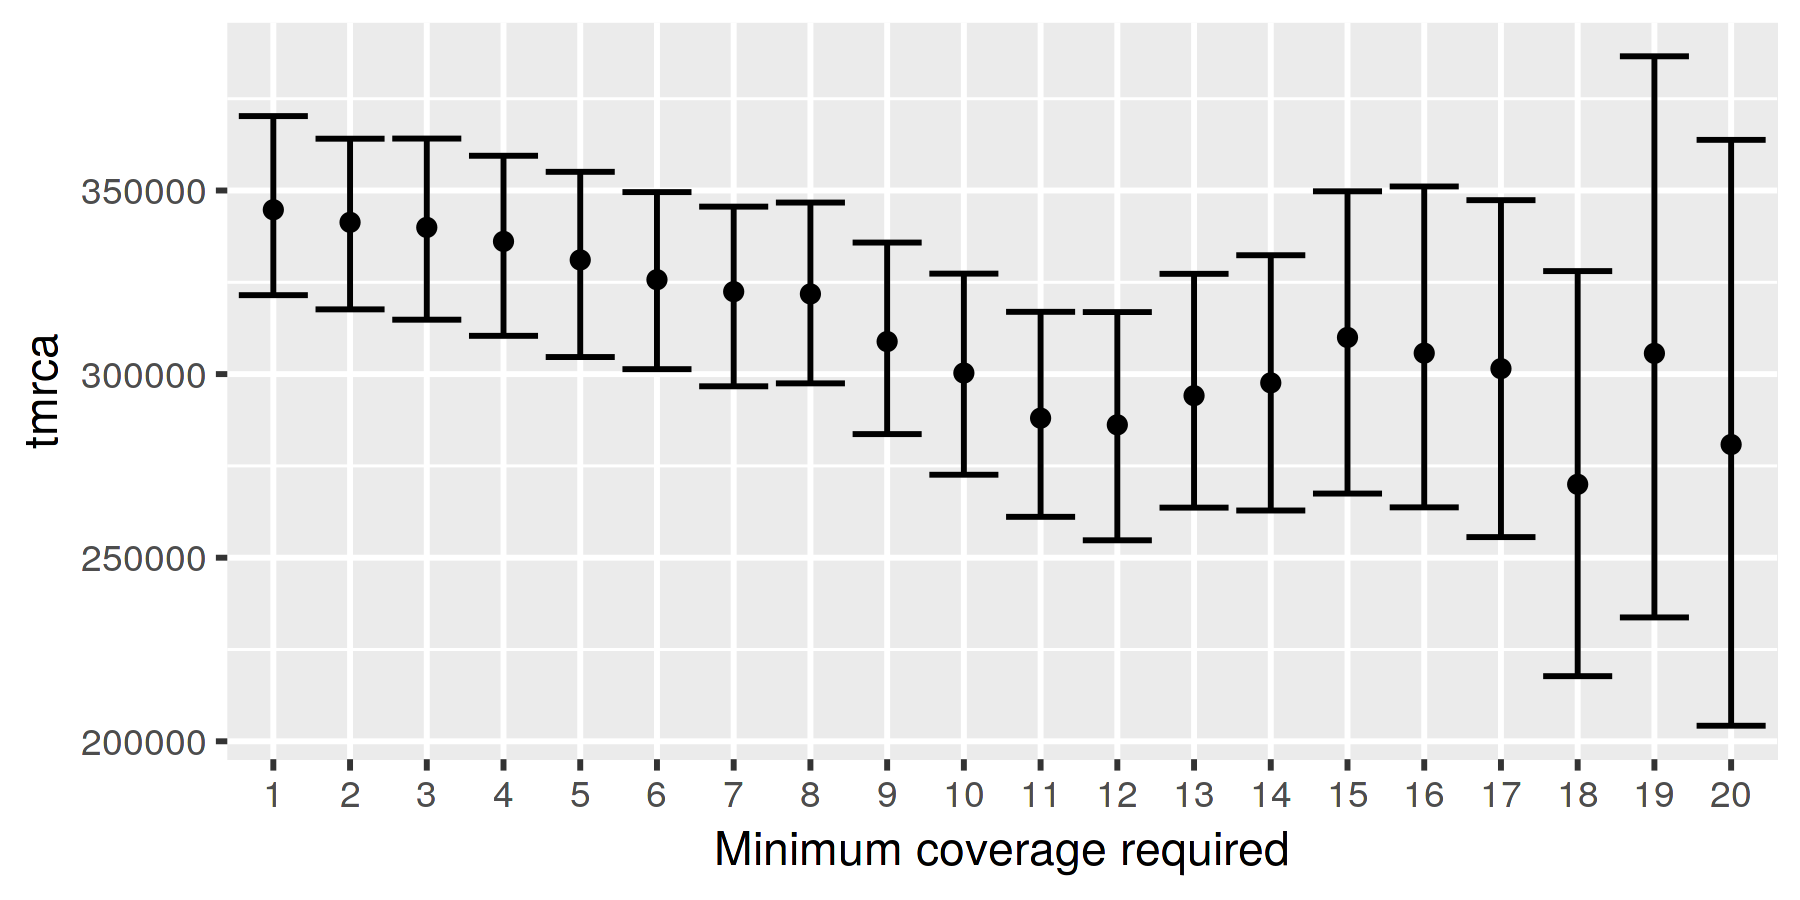

In [12]:
set_dim(6, 3)

direct_tmrca %>%
mutate(pmap(list(hum, total, mut_rate), function(hum, total, mut_rate) {
    counts <- rpois(1000, hum) / (total * mut_rate)
    ci <- quantile(counts, probs = c(0.025, 0.975), na.rm = TRUE)
    tibble(lower = ci[1], upper = ci[2])
    })) %>%
unnest %>%
ggplot(aes(as.factor(dp), tmrca)) +
    geom_point() +
    geom_errorbar(aes(ymin = lower, ymax = upper)) +
    xlab("Minimum coverage required")

Warning message:
“Removed 9 rows containing missing values (geom_point).”

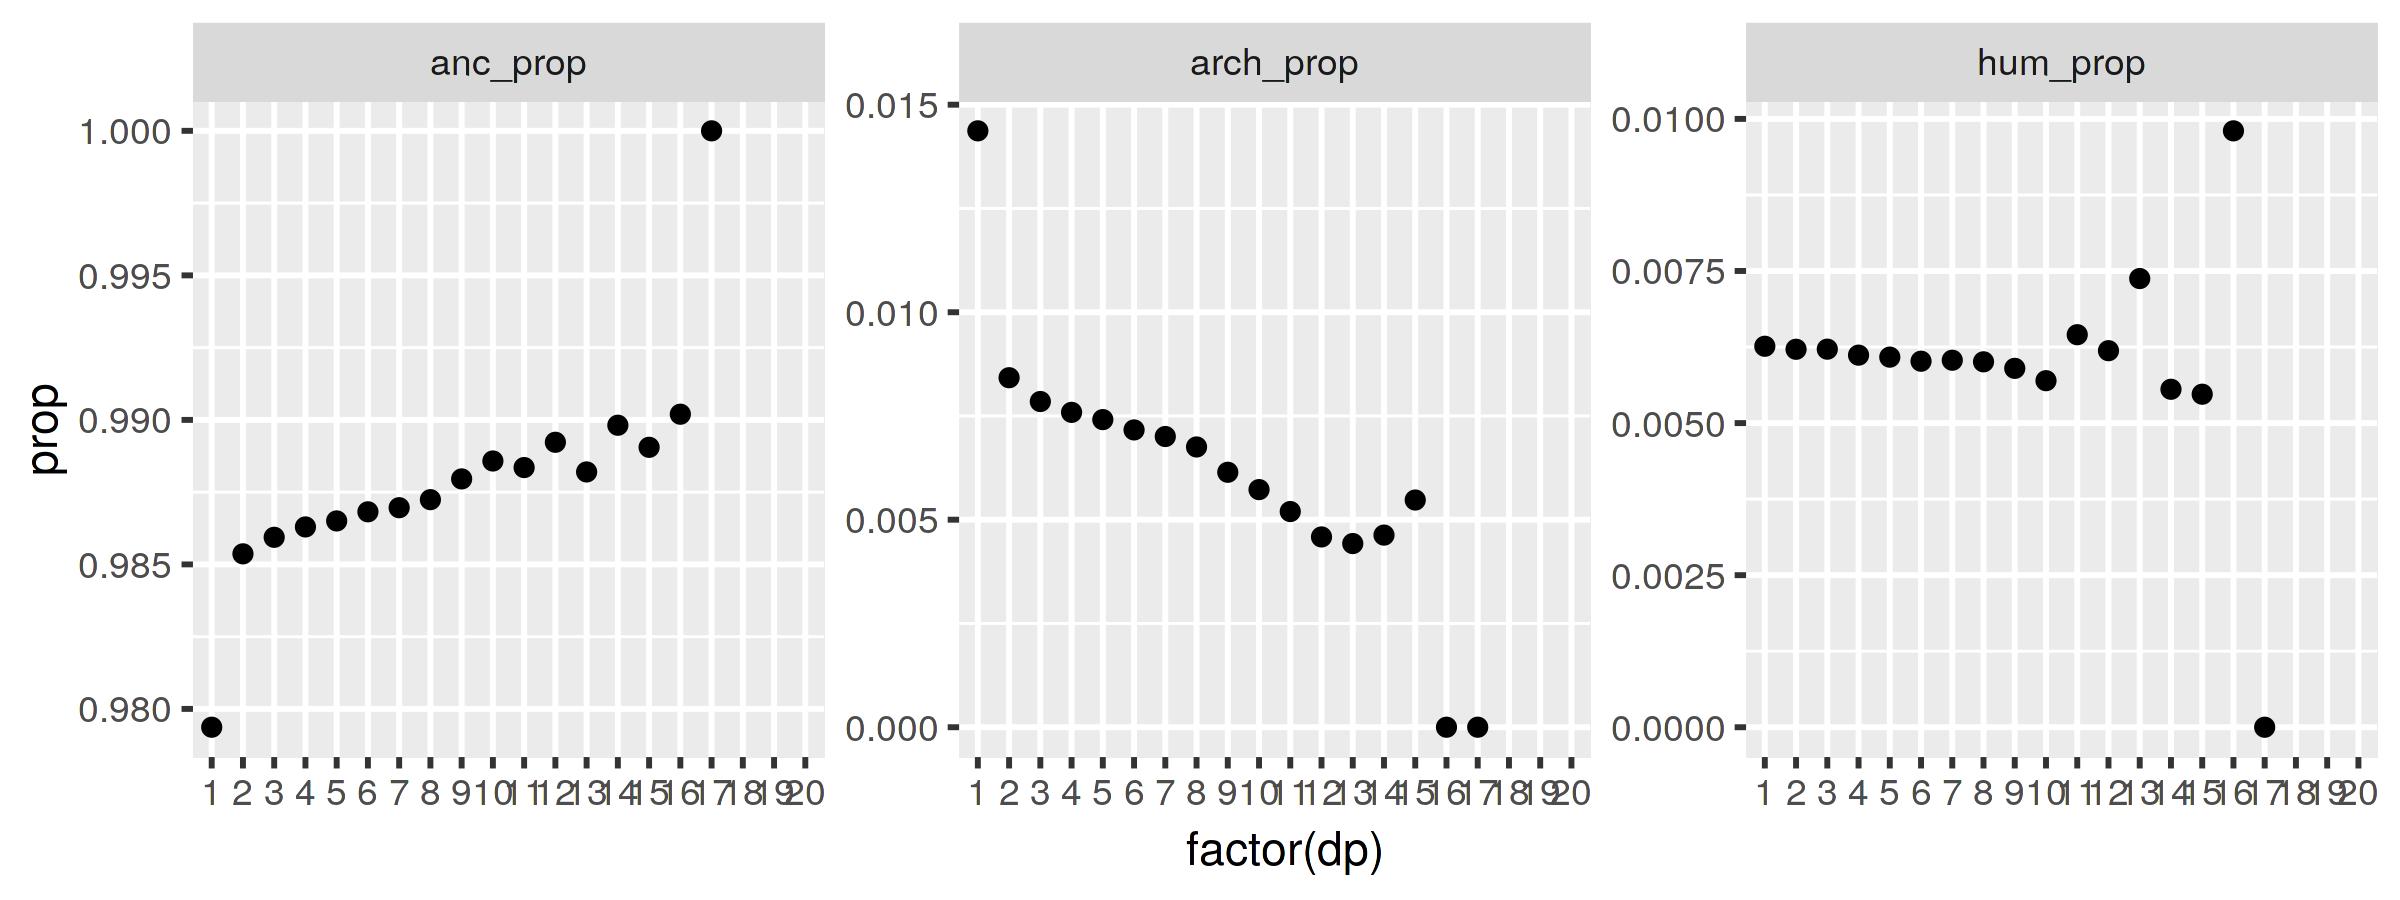

In [5]:
set_dim(8, 3)

direct_tmrca %>%
mutate(n = arch + hum + anc, arch_prop = arch / n, hum_prop = hum / n, anc_prop = anc / n) %>%
select(name, dp, arch_prop, hum_prop, anc_prop) %>%
gather(branch, prop, -name, -dp) %>%
ggplot(aes(factor(dp), prop)) + geom_point() + facet_wrap(~ branch, scales = "free")

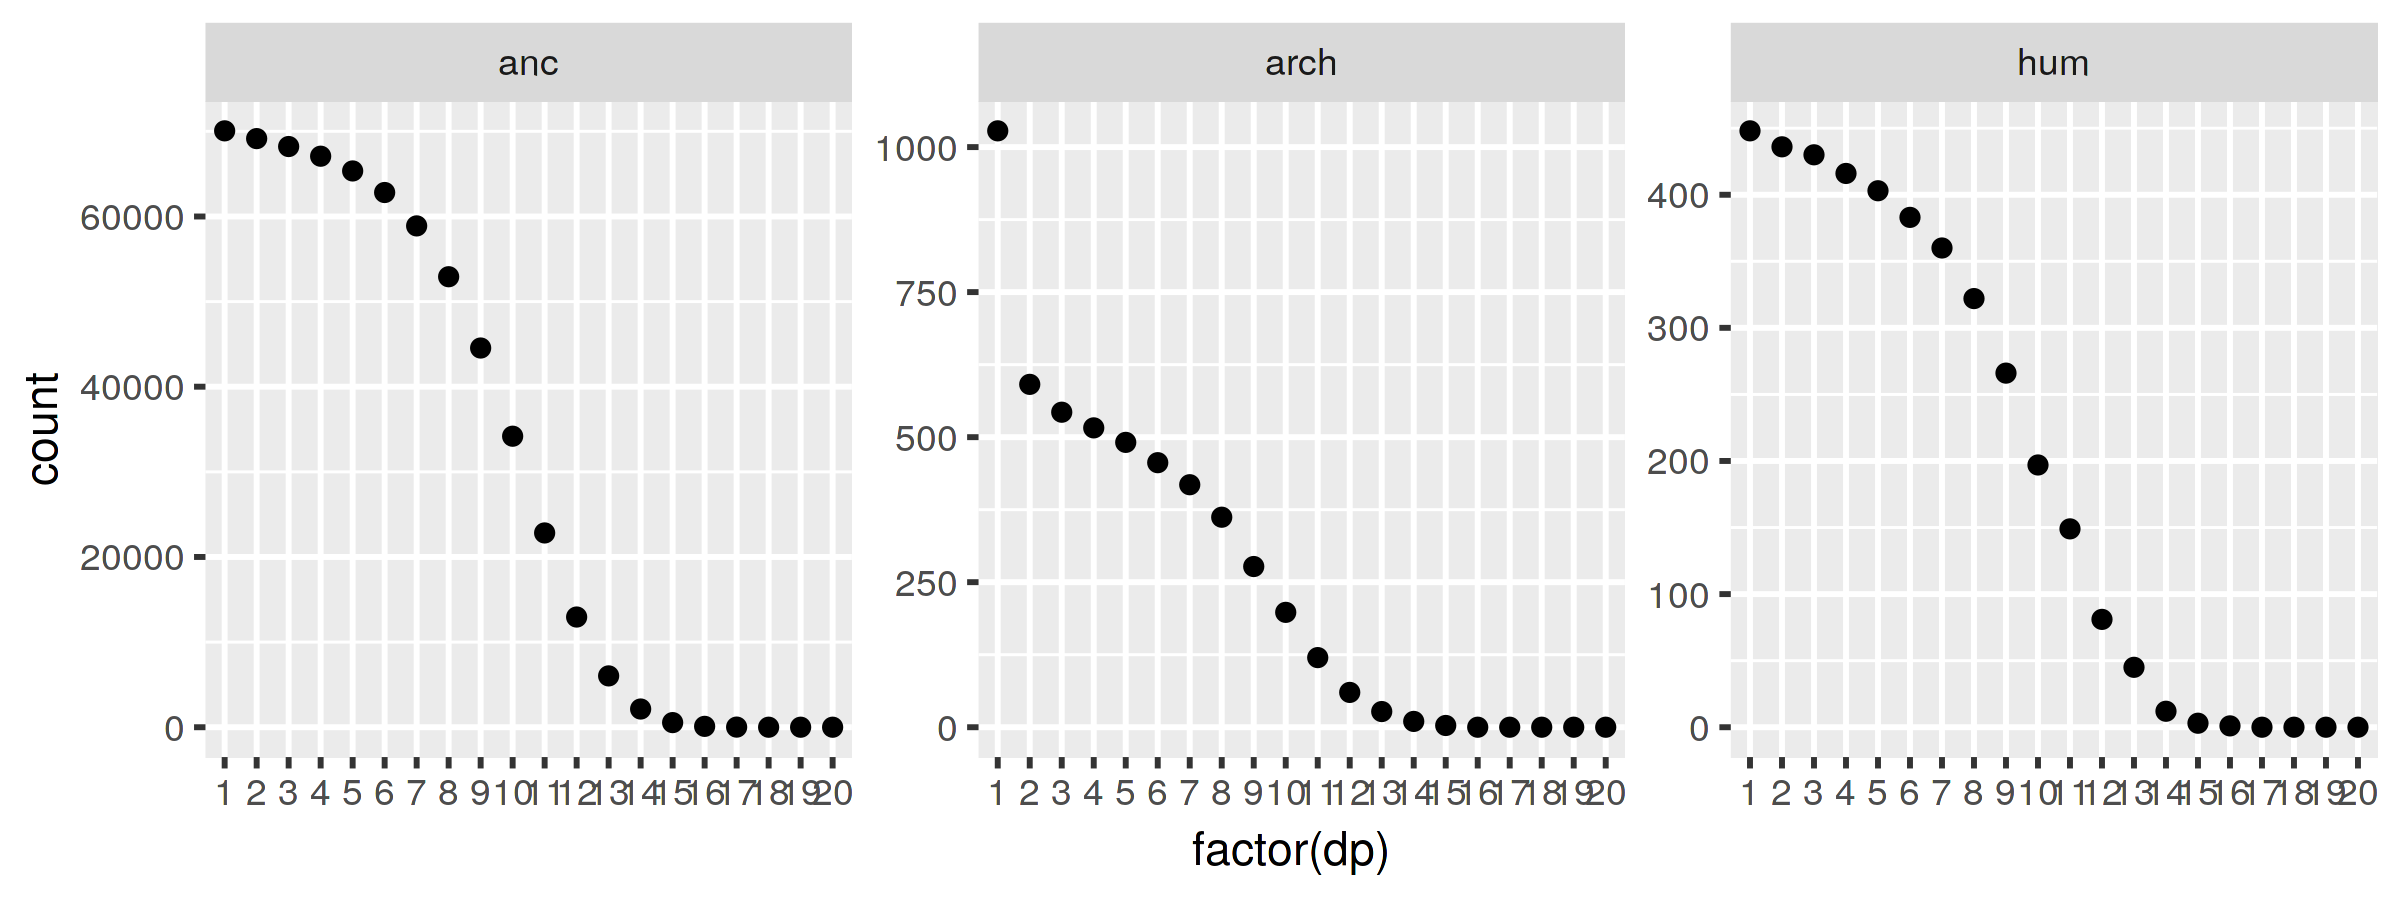

In [6]:
set_dim(8, 3)

direct_tmrca %>%
select(name, dp, arch, hum, anc) %>%
gather(branch, count, -name, -dp) %>%
ggplot(aes(factor(dp), count)) + geom_point() + facet_wrap(~ branch, scales = "free")

Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

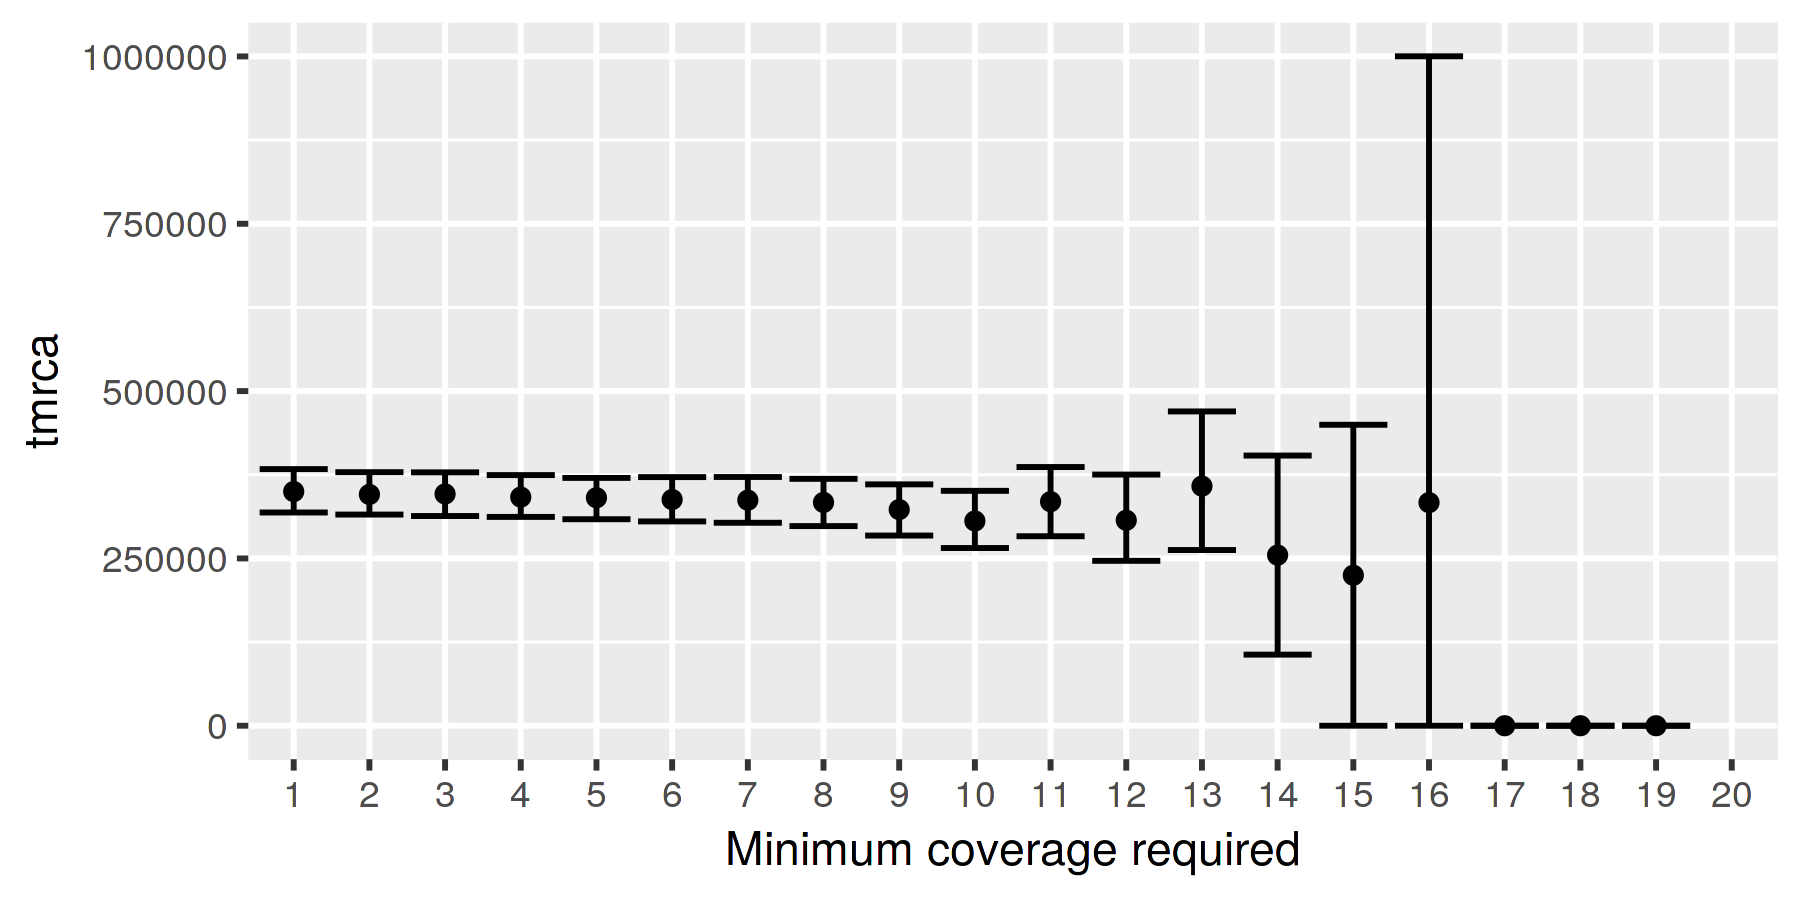

In [7]:
set_dim(6, 3)

direct_tmrca %>%
mutate(pmap(list(hum, total, mut_rate), function(hum, total, mut_rate) {
    counts <- rpois(1000, hum) / (total * mut_rate)
    ci <- quantile(counts, probs = c(0.025, 0.975), na.rm = TRUE)
    tibble(lower = ci[1], upper = ci[2])
    })) %>%
unnest %>%
ggplot(aes(as.factor(dp), tmrca)) +
    geom_point() +
    geom_errorbar(aes(ymin = lower, ymax = upper)) +
    xlab("Minimum coverage required")

In [15]:
direct_tmrca2 <- future_map_dfr(1:10, function(i) calculate_direct("den8", "full", i))

In [16]:
direct_tmrca2

name,arch,hum,anc,total,mut_rate,tmrca,dp
den8,12341,1085,71998,2911057,4.712273e-10,790949.2,1
den8,1770,807,61433,2457678,4.712273e-10,696816.0,2
den8,657,585,48315,1925564,4.712273e-10,644714.6,3
den8,358,386,35480,1398203,4.712273e-10,585850.3,4
den8,211,234,23809,934757,4.711651e-10,531305.1,5
den8,112,140,14549,573573,4.704490e-10,518832.0,6
den8,56,72,7969,316456,4.720909e-10,481940.6,7
den8,31,34,3769,149151,4.708237e-10,484166.2,8
den8,7,10,1263,50523,4.707900e-10,420420.3,9
den8,0,0,0,0,4.706079e-10,NaN,10


Warning message:
“Removed 3 rows containing missing values (geom_point).”

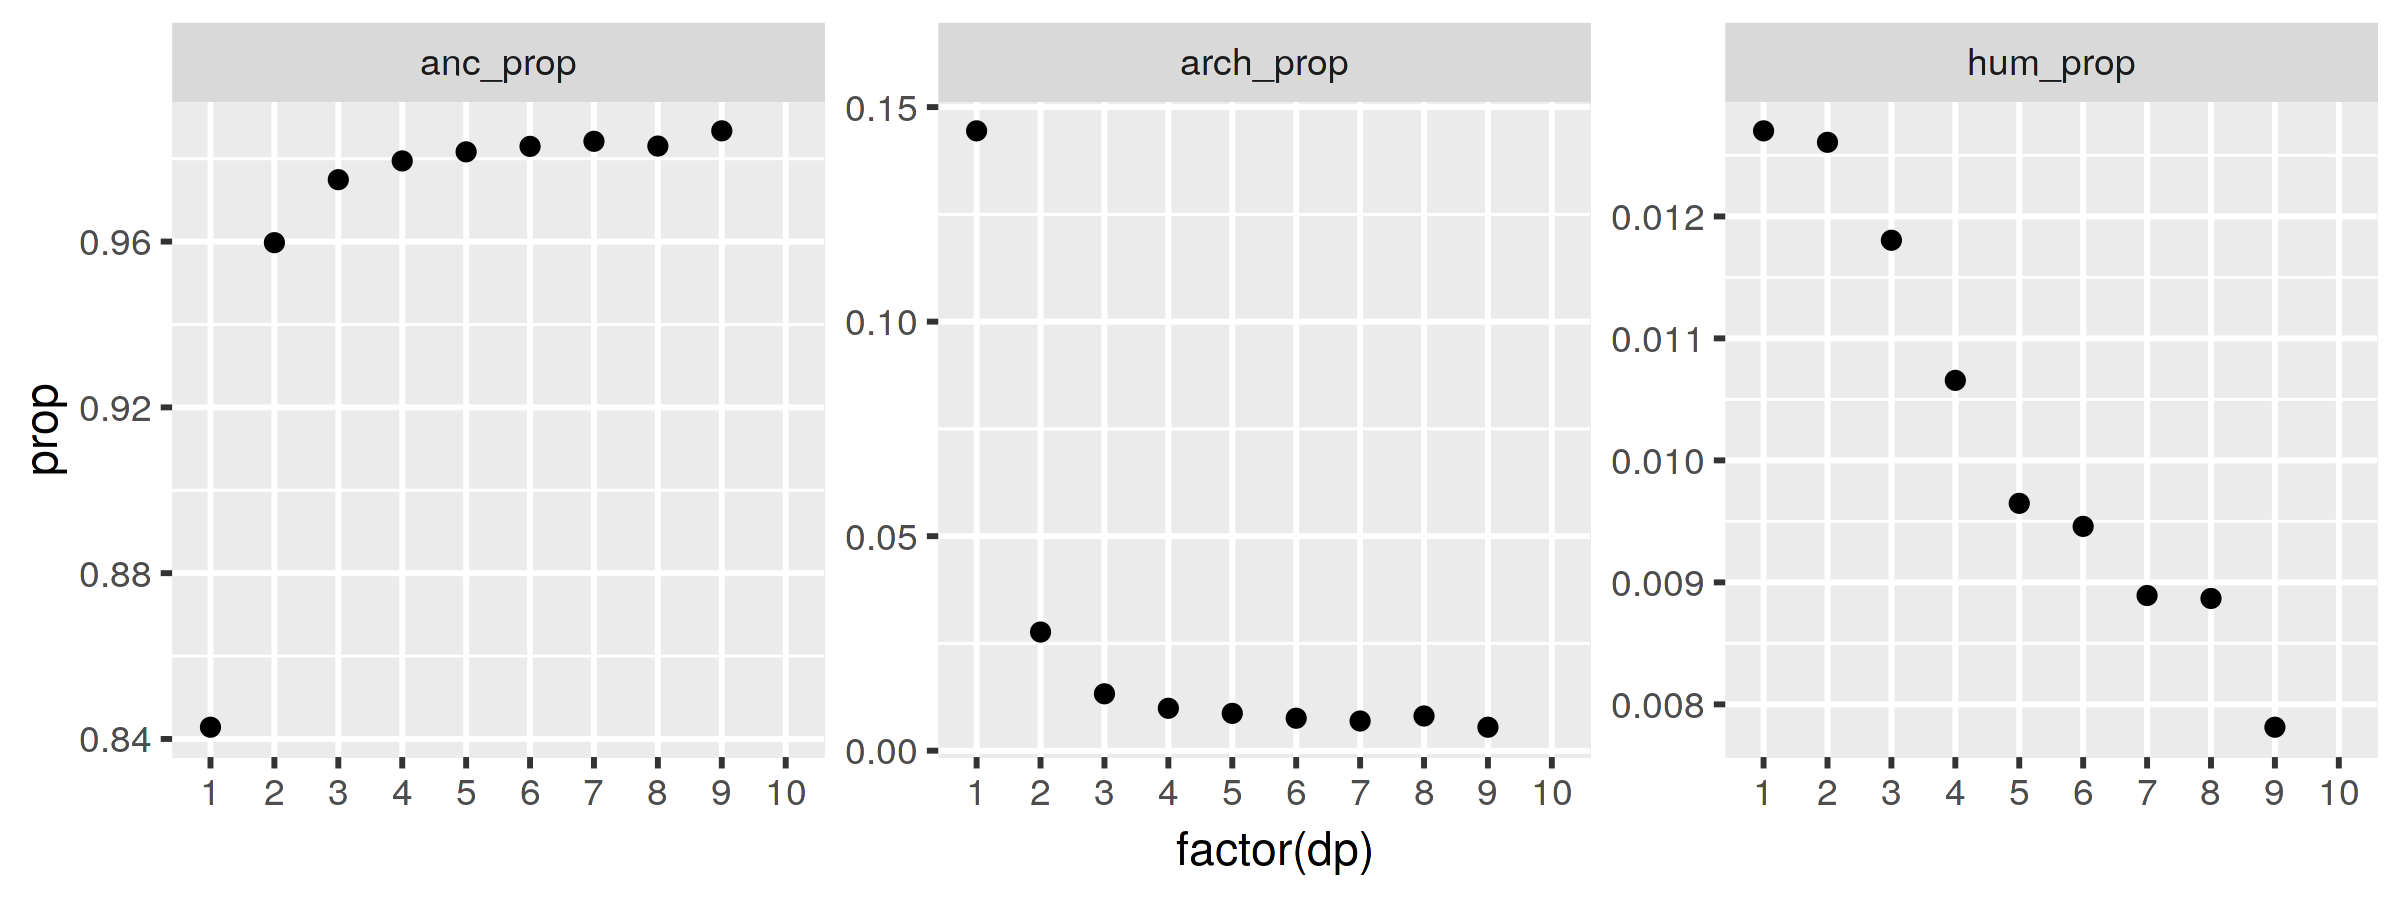

In [22]:
set_dim(8, 3)

direct_tmrca2 %>%
mutate(n = arch + hum + anc, arch_prop = arch / n, hum_prop = hum / n, anc_prop = anc / n) %>%
select(name, dp, arch_prop, hum_prop, anc_prop) %>%
gather(branch, prop, -name, -dp) %>%
ggplot(aes(factor(dp), prop)) + geom_point() + facet_wrap(~ branch, scales = "free")

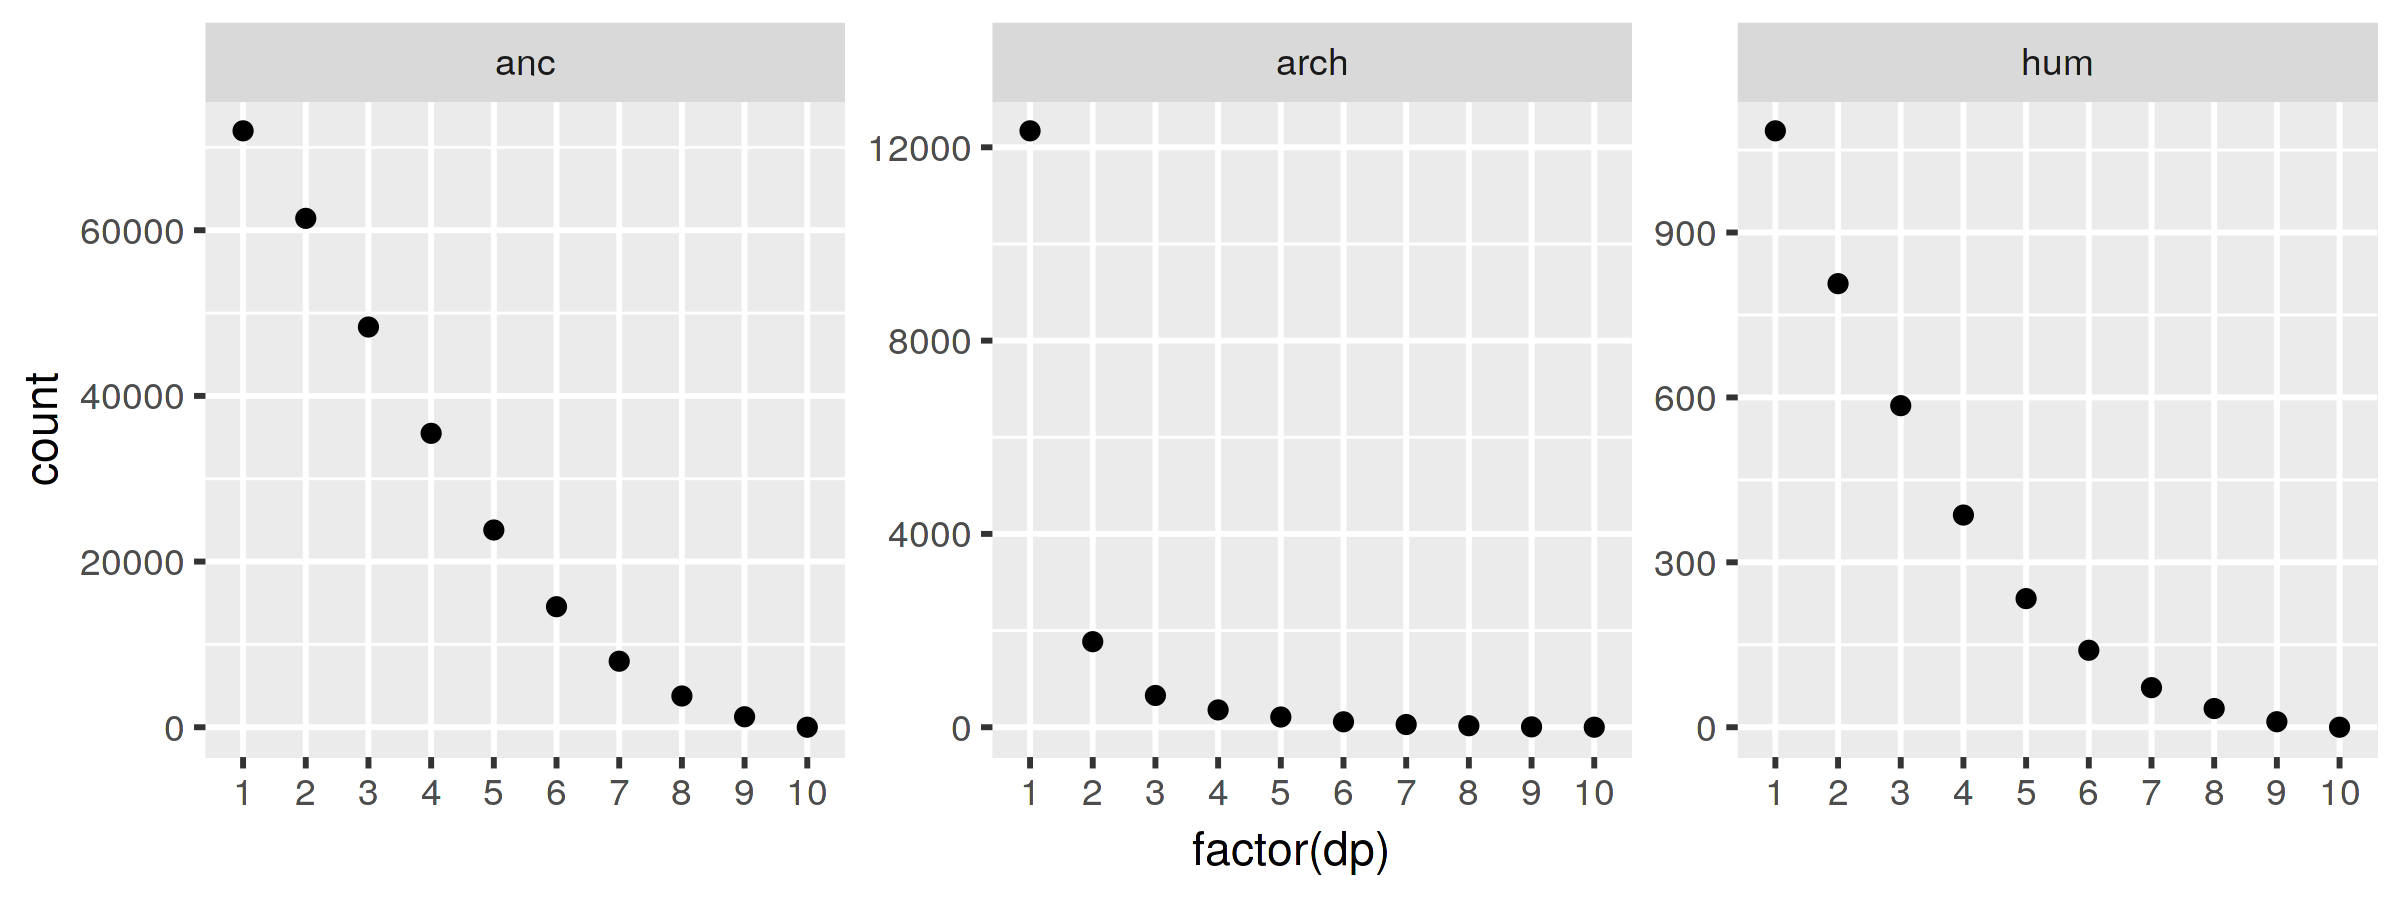

In [21]:
set_dim(8, 3)

direct_tmrca2 %>%
select(name, dp, arch, hum, anc) %>%
gather(branch, count, -name, -dp) %>%
ggplot(aes(factor(dp), count)) + geom_point() + facet_wrap(~ branch, scales = "free")

Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

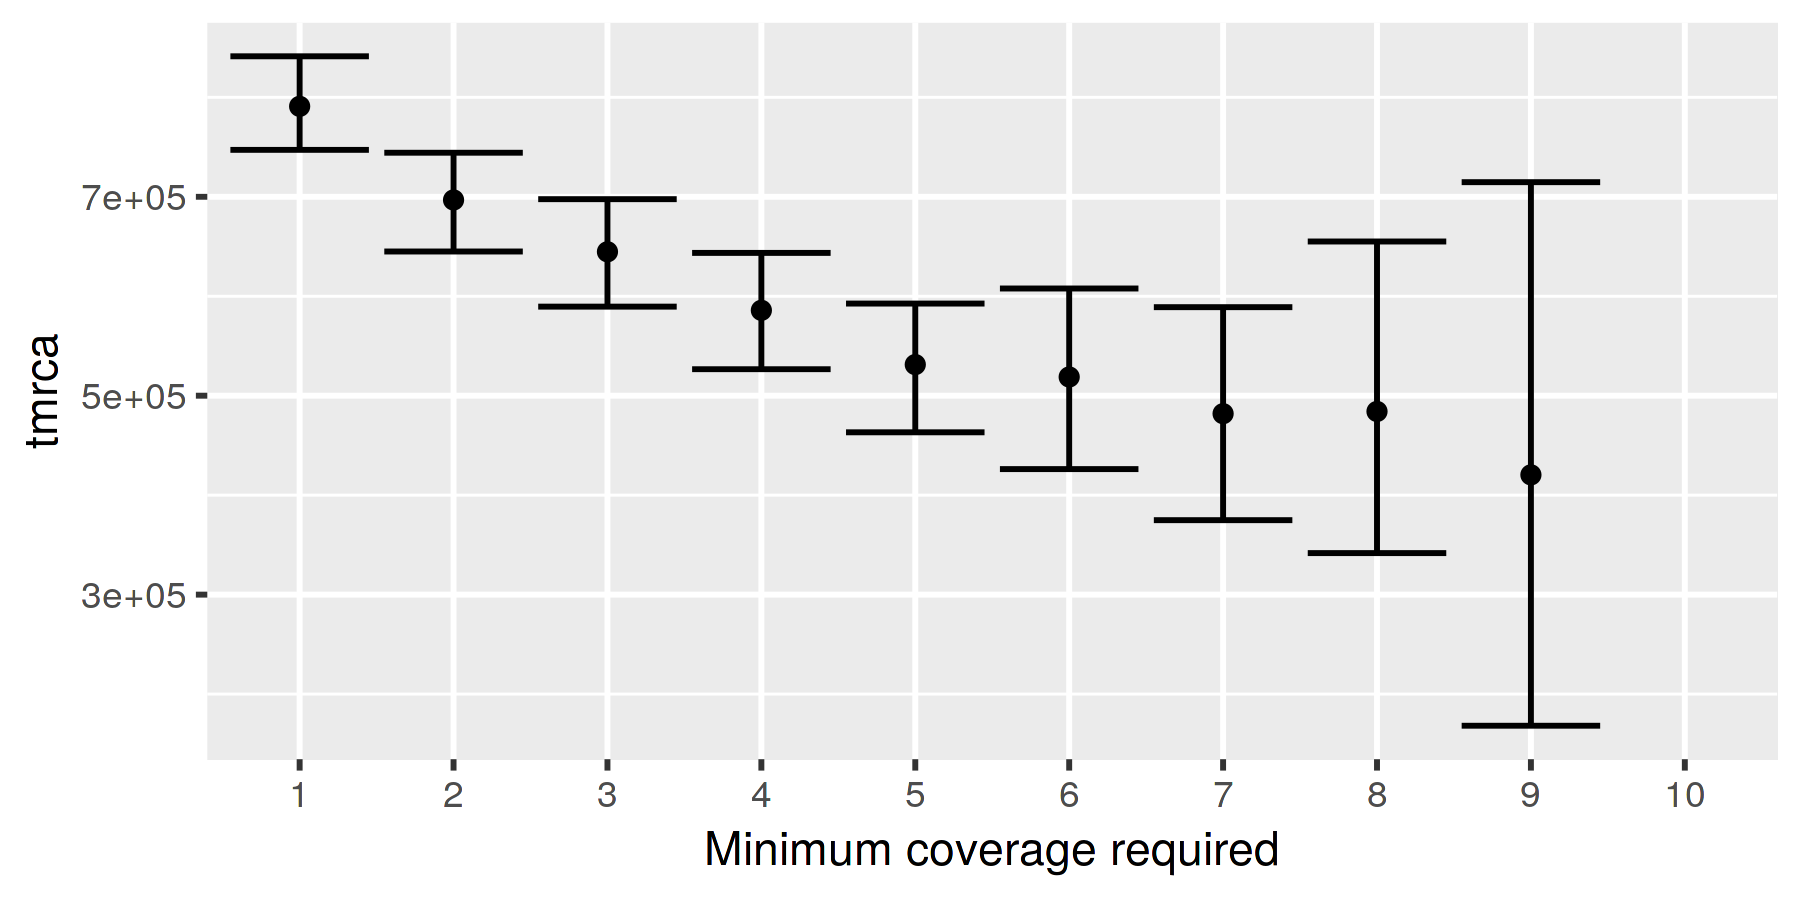

In [17]:
set_dim(6, 3)

direct_tmrca2 %>%
mutate(pmap(list(hum, total, mut_rate), function(hum, total, mut_rate) {
    counts <- rpois(1000, hum) / (total * mut_rate)
    ci <- quantile(counts, probs = c(0.025, 0.975), na.rm = TRUE)
    tibble(lower = ci[1], upper = ci[2])
    })) %>%
unnest %>%
ggplot(aes(as.factor(dp), tmrca)) +
    geom_point() +
    geom_errorbar(aes(ymin = lower, ymax = upper)) +
    xlab("Minimum coverage required")

In [18]:
direct_tmrca3 <- future_map_dfr(1:10, function(i) calculate_direct("spy1", "full", i))

In [19]:
direct_tmrca3

name,arch,hum,anc,total,mut_rate,tmrca,dp
spy1,18603,344,39935,1714626,4.712273e-10,425753.9,1
spy1,2052,111,16785,726146,4.712273e-10,324390.9,2
spy1,392,39,6552,286396,4.712273e-10,288979.6,3
spy1,92,17,2338,103783,4.712273e-10,347610.0,4
spy1,23,8,707,29614,4.711651e-10,573350.0,5
spy1,0,0,0,0,4.704490e-10,NaN,6
spy1,0,0,0,0,4.720909e-10,NaN,7
spy1,0,0,0,0,4.708237e-10,NaN,8
spy1,0,0,0,0,4.707900e-10,NaN,9
spy1,0,0,0,0,4.706079e-10,NaN,10


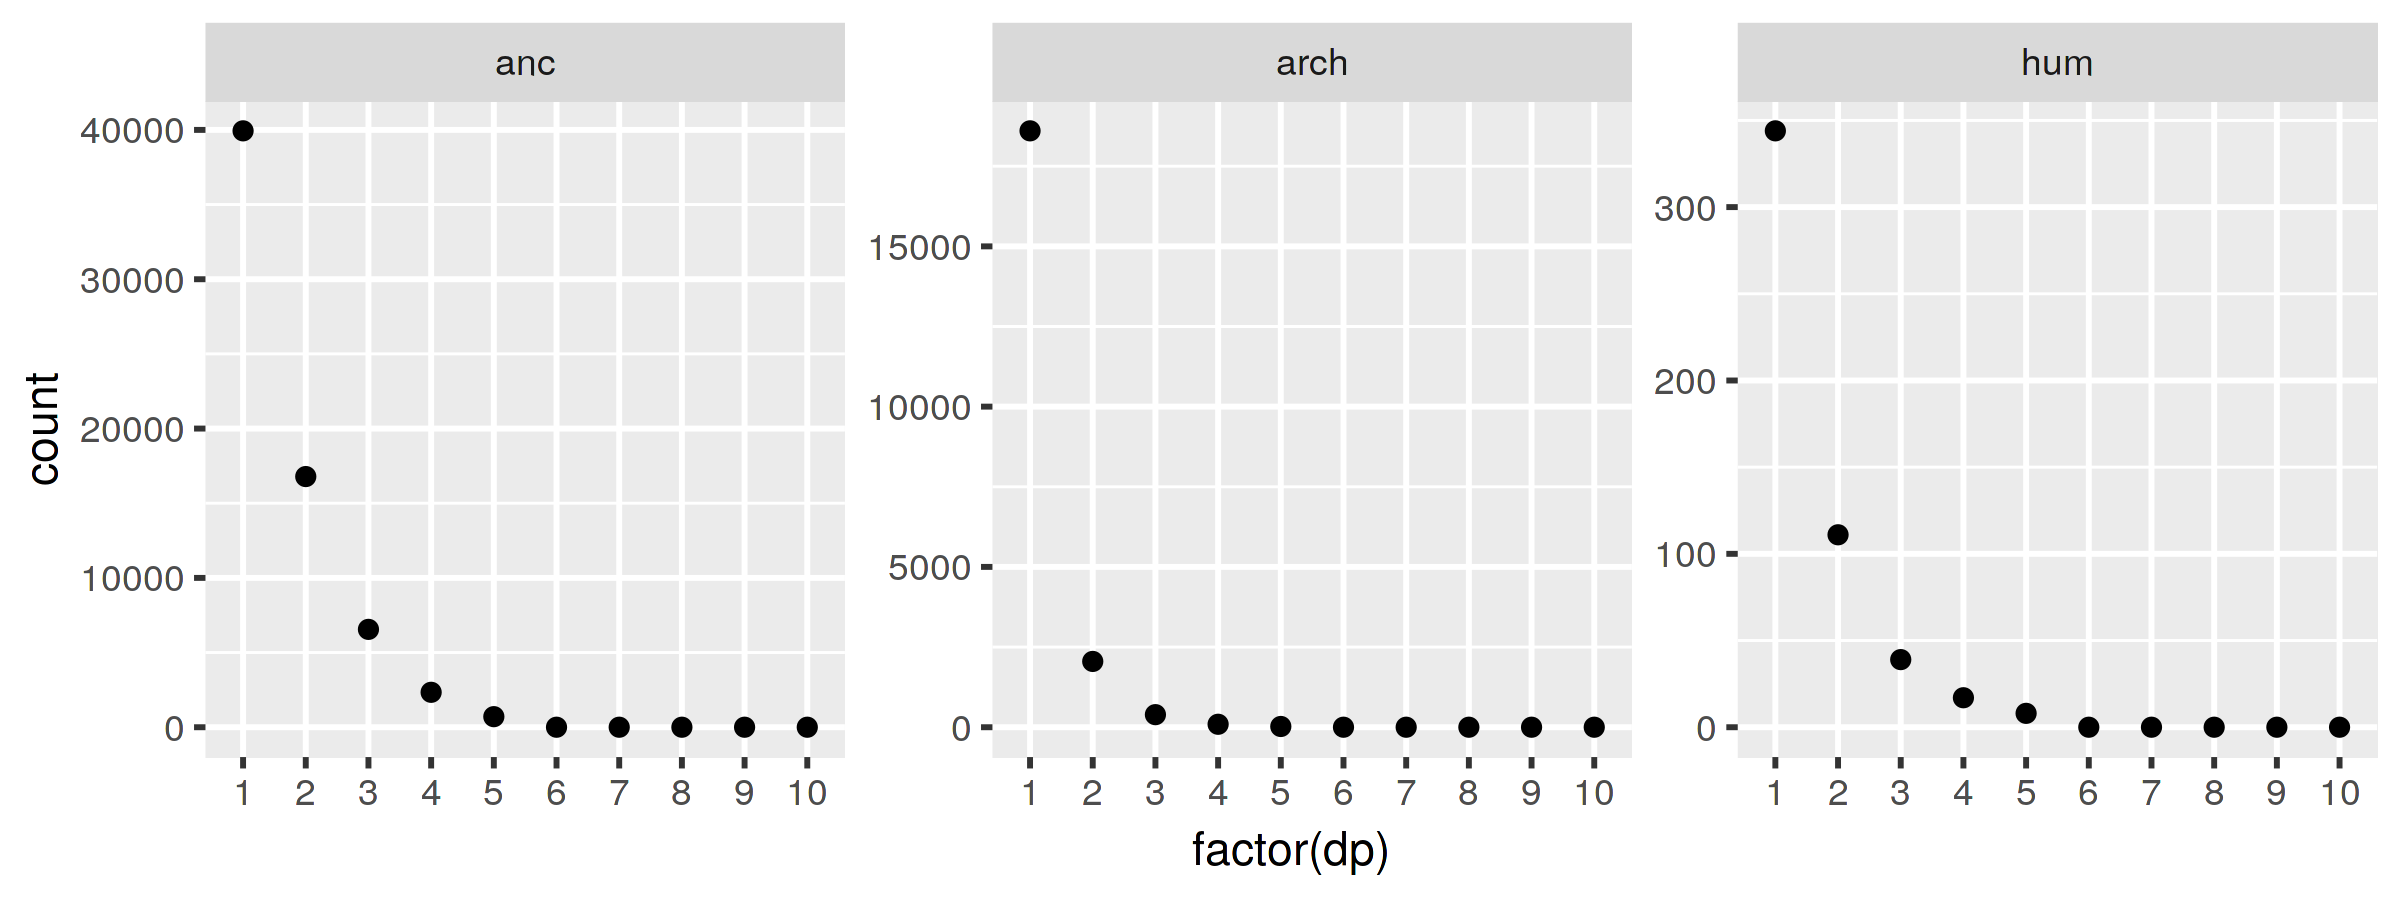

In [23]:
set_dim(8, 3)

direct_tmrca3 %>%
select(name, dp, arch, hum, anc) %>%
gather(branch, count, -name, -dp) %>%
ggplot(aes(factor(dp), count)) + geom_point() + facet_wrap(~ branch, scales = "free")

Warning message:
“Removed 5 rows containing missing values (geom_point).”Warning message:
“Removed 5 rows containing missing values (geom_errorbar).”

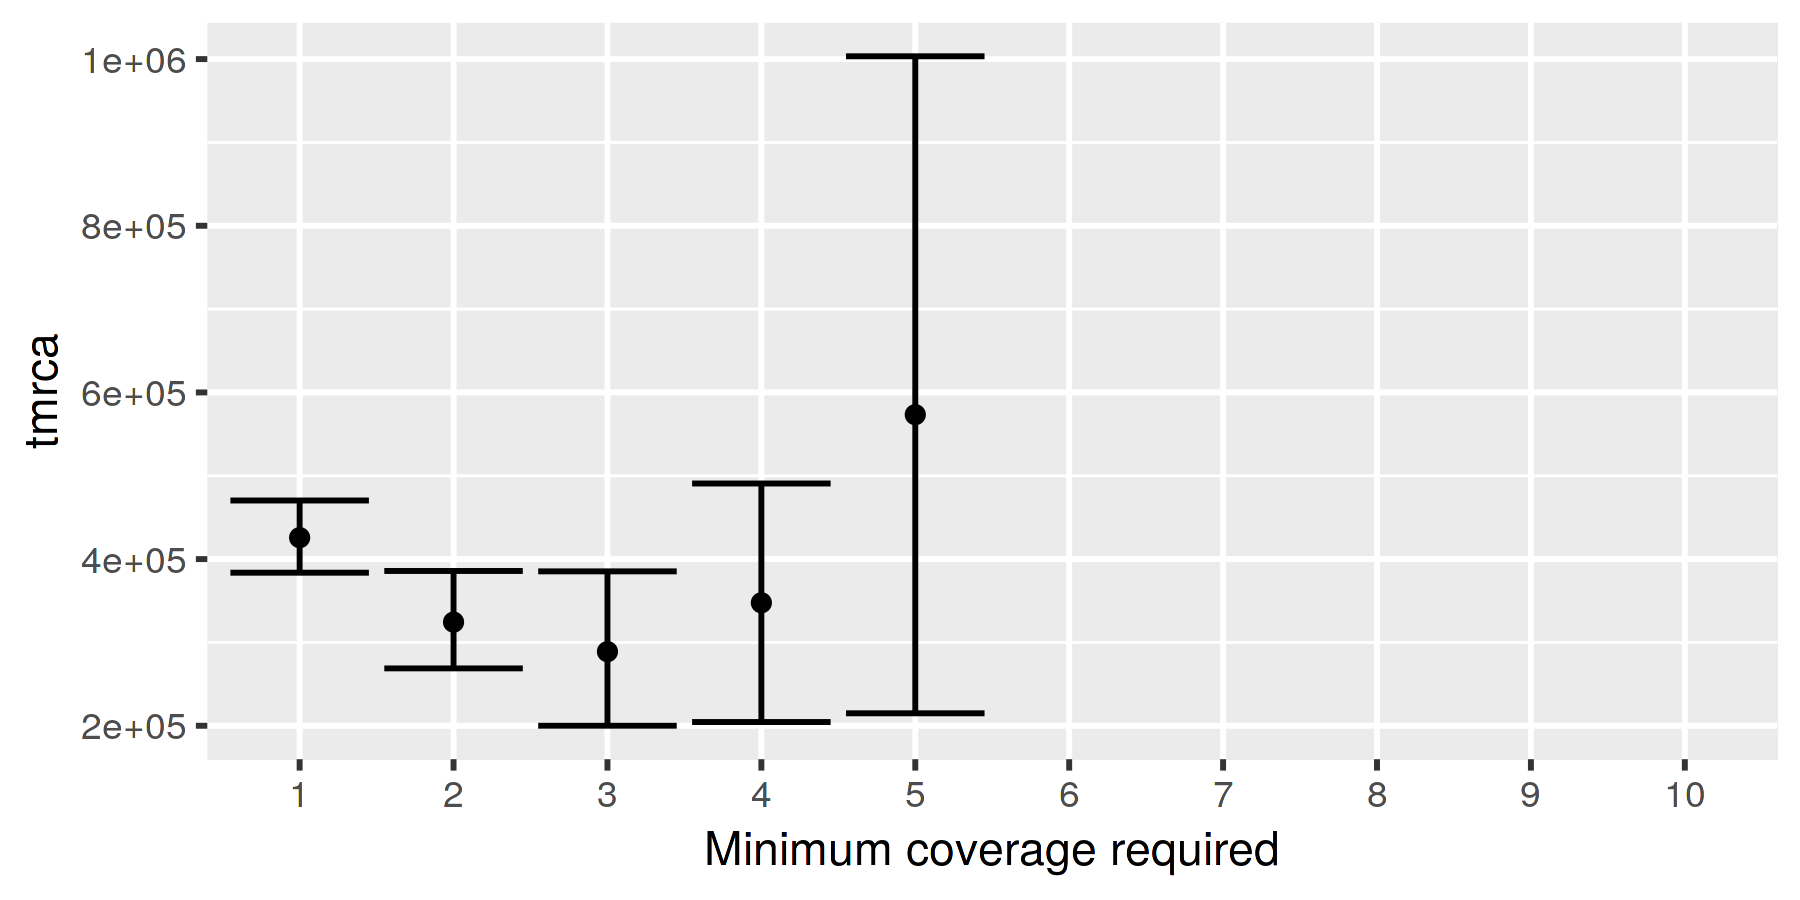

In [20]:
set_dim(6, 3)

direct_tmrca3 %>%
mutate(pmap(list(hum, total, mut_rate), function(hum, total, mut_rate) {
    counts <- rpois(1000, hum) / (total * mut_rate)
    ci <- quantile(counts, probs = c(0.025, 0.975), na.rm = TRUE)
    tibble(lower = ci[1], upper = ci[2])
    })) %>%
unnest %>%
ggplot(aes(as.factor(dp), tmrca)) +
    geom_point() +
    geom_errorbar(aes(ymin = lower, ymax = upper)) +
    xlab("Minimum coverage required")

# Putting lower quality Y chromosomes along the Mez2 lineage

In [31]:
gt_mez2 <- read_genotypes("mez2", "full", mindp = 3, maxdp = 0.975, tv_only = TRUE)

In [9]:
nrow(filter(select(gt_mez2, chrom, pos, REF, ALT, mez2, chimp, a00), complete.cases(select(gt_mez2, chrom, pos, REF, ALT, mez2, chimp, a00))))

[1] 4563209

In [10]:
nrow(filter(gt_mez2, complete.cases(gt_mez2)))

[1] 2635044

In [11]:
nrow(filter(select(gt_mez2, -mez2), complete.cases(select(gt_mez2, -mez2))))

[1] 3507286

In [12]:
nrow(gt_mez2)

[1] 6848904

In [ ]:
gt_highcov <- read_vcf(here("data/vcf/full_highcov.vcf.gz"), mindp = 3, maxdp = 0.975, tv_only = TRUE)

In [23]:
tafr1 <- gt_mez2 %>% calculate_tafr(afr = "a00") %>% unnest(counts_afr) %>% group_by(afr) %>% summarise_if(is.numeric, mean)

In [24]:
tafr2 <- gt_mez2 %>% filter(complete.cases(.)) %>% calculate_tafr(afr = "a00") %>% unnest(counts_afr) %>% group_by(afr) %>% summarise_if(is.numeric, mean)

In [25]:
tafr3 <- gt_mez2 %>% select(-mez2) %>% filter(complete.cases(.)) %>% calculate_tafr(afr = "a00") %>% unnest(counts_afr) %>% group_by(afr) %>% summarise_if(is.numeric, mean)

In [30]:
tafr4 <- gt_highcov %>% filter(complete.cases(.)) %>% calculate_tafr(afr = "a00") %>% unnest(counts_afr) %>% group_by(afr) %>% summarise_if(is.numeric, mean)

In [31]:
tafr5 <- gt_highcov %>% calculate_tafr(afr = "a00") %>% unnest(counts_afr) %>% group_by(afr) %>% summarise_if(is.numeric, mean)

In [26]:
tafr1

afr,tmrca_afr,tmrca_ad,tmrca_f,mut_rate,age,a,b,c,d,e,f,total
a00,284858.4,314419.2,255297.6,4.712273e-10,45000,696.9231,0.1538462,3.307692,129.5385,10.46154,670.4615,5616066


In [27]:
tafr2

afr,tmrca_afr,tmrca_ad,tmrca_f,mut_rate,age,a,b,c,d,e,f,total
a00,247215.9,226666.9,267765,4.456696e-10,45000,208.4615,0,1.230769,55.38462,2.538462,311,2635044


In [28]:
tafr3

afr,tmrca_afr,tmrca_ad,tmrca_f,mut_rate,age,a,b,c,d,e,f,total
a00,301723.1,329768.2,273677.9,4.449833e-10,45000,433.6923,0.1538462,1.615385,76.53846,6.307692,422.8462,3507286


In [32]:
tafr4

afr,tmrca_afr,tmrca_ad,tmrca_f,mut_rate,age,a,b,c,d,e,f,total
a00,301723.1,329768.2,273677.9,4.449833e-10,45000,433.6923,0.1538462,1.615385,76.53846,6.307692,422.8462,3507286


In [33]:
tafr5

afr,tmrca_afr,tmrca_ad,tmrca_f,mut_rate,age,a,b,c,d,e,f,total
a00,284858.4,314419.2,255297.6,4.712273e-10,45000,696.9231,0.1538462,3.307692,129.5385,10.46154,670.4615,5616066


In [35]:
gt_highcov %>% filter(!complete.cases(.)) %>% sample_n(50)

chrom,pos,REF,ALT,chimp,ustishim,a00,S_BedouinB_1,S_Turkish_1,S_French_1,⋯,S_Punjabi_1,S_Saami_2,S_Papuan_2,S_Karitiana_1,S_Dinka_1,S_Mbuti_1,S_Yoruba_2,S_Gambian_1,S_Mandenka_1,S_Ju_hoan_North_1
Y,15437482,T,,0,0,0,0,0,0,⋯,0,0,NA,0,0,NA,0,0,0,0
Y,16610857,A,,0,0,0,0,0,0,⋯,0,NA,0,0,0,0,0,0,0,0
Y,21552739,T,,NA,0,NA,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Y,21748932,C,,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,NA
Y,21221719,A,,0,0,0,0,0,0,⋯,0,0,0,0,NA,0,0,0,0,0
Y,18808815,T,,0,0,0,0,0,0,⋯,0,0,0,NA,0,0,0,0,0,0
Y,16182976,T,,0,0,0,0,0,0,⋯,0,0,NA,0,0,0,0,0,0,0
Y,8550323,T,,0,0,0,0,0,0,⋯,0,0,0,NA,0,0,0,0,0,0
Y,8801846,C,G,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Y,16294071,C,,0,0,0,0,0,0,⋯,0,0,0,0,0,0,NA,0,0,0


In [5]:
archaic <- "den8"

In [6]:
arch <- read_vcf(here(paste0("data/vcf/full_", archaic, ".vcf.gz")), mindp = 3, maxdp = 0.975, tv_only = TRUE)

In [7]:
joined <- inner_join(info, arch, by = c("chrom", "pos", "REF")) %>%
    filter(ALT.y == "" | ALT.x == "" | ALT.x == ALT.y) %>%
    filter(complete.cases(.))

In [8]:
head(joined)

chrom,pos,REF,ALT.x,mez2,chimp,a00,ALT.y,den8
Y,2649862,A,,0,0,0,,0
Y,2649863,C,,0,0,0,,0
Y,2649864,A,,0,0,0,,0
Y,2649865,C,,0,0,0,,0
Y,2649866,A,,0,0,0,,0
Y,2649867,T,,0,0,0,,0


Denisova8 

In [17]:
nrow(joined)

[1] 2593149

In [22]:
count_split <- sum(joined$mez2 == joined$a00 & joined$mez2 != joined$chimp & joined$mez2 != joined[["den8"]])
count_split

[1] 342

In [20]:
mut_rate <- 4.457122e-10

In [21]:
342 / (2593149 * mut_rate)

[1] 295899.4

In [16]:
295899.419173755 + 350000

[1] 645899.4

Spy1

In [93]:
nrow(joined)

[1] 397834

In [98]:
split_count <- sum(joined$mez2 == joined$a00 & joined$mez2 != joined$chimp & joined$mez2 != joined[[archaic]])

In [99]:
split_time <- split_count / (nrow(joined) * mut_rate)

In [101]:
split_time + 366157.2

[1] 366157.2

Denisova8 

In [72]:
nrow(joined)

[1] 2593149

In [43]:
sum(joined$mez2 != joined[["den8"]]) / nrow(joined)

[1] 0.005270295

In [77]:
sum(joined$mez2 == joined$a00 & joined$mez2 != joined$chimp & joined$mez2 != joined[[arch]])

[1] 342

In [91]:
342 / (2593149 * mut_rate)

[1] 295899.4

In [81]:
295899.419173755 + 350000

[1] 645899.4

Read the high coverage genotypes of Mezmaiskaya 2, present-day AMH and chimpanzee:

In [107]:
gt_mez2 <- read_genotypes("mez2", "full", mindp = 3, maxdp = 0.975, tv_only = TRUE)

Estimate the mutation rate, as part of the A00 TMRCA calculation used elsewhere:

In [109]:
tafr <- calculate_tafr(gt_mez2, afr = "a00") %>% group_by(afr) %>% summarise_if(is.numeric, mean)

In [138]:
extrapolate_direct <- function(archaic) {
    capture <- ifelse(archaic == "elsidron2", "lippold", "full")
    
    gt_arch <- read_vcf(here(paste0("data/vcf/", capture, "_", archaic, ".vcf.gz")), mindp = 3, maxdp = 0.975, tv_only = TRUE)
    
    gt <- inner_join(gt_mez2, gt_arch, by = c("chrom", "pos", "REF")) %>%
        filter(ALT.y == "" | ALT.x == "" | ALT.x == ALT.y) %>%
        filter(complete.cases(.))

    split_count <- sum(gt$mez2 == gt$a00 & gt$mez2 != gt$chimp & gt$mez2 != gt[[archaic]])

    tibble(
        archaic = archaic,
        count = split_count,
        total = nrow(gt),
        tmrca = split_count / (total * tafr$mut_rate) + filter(direct_tmrca, dp == 3)$tmrca
    )
}

In [139]:
tmrca_df <- future_map_dfr(c("den4", "den8", "spy1", "elsidron2", "shotgun_spy1", "shotgun_mez2"), extrapolate_direct)

In [140]:
tmrca_df

archaic,count,total,tmrca
den4,70,638321,598874.4
den8,207,1508272,657403.4
spy1,0,222228,366157.2
elsidron2,0,195134,366157.2
shotgun_spy1,0,41722,366157.2
shotgun_mez2,0,165338,366157.2


2.5%    97.5% 
545681.9 655391.4

[1] 599134.1

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


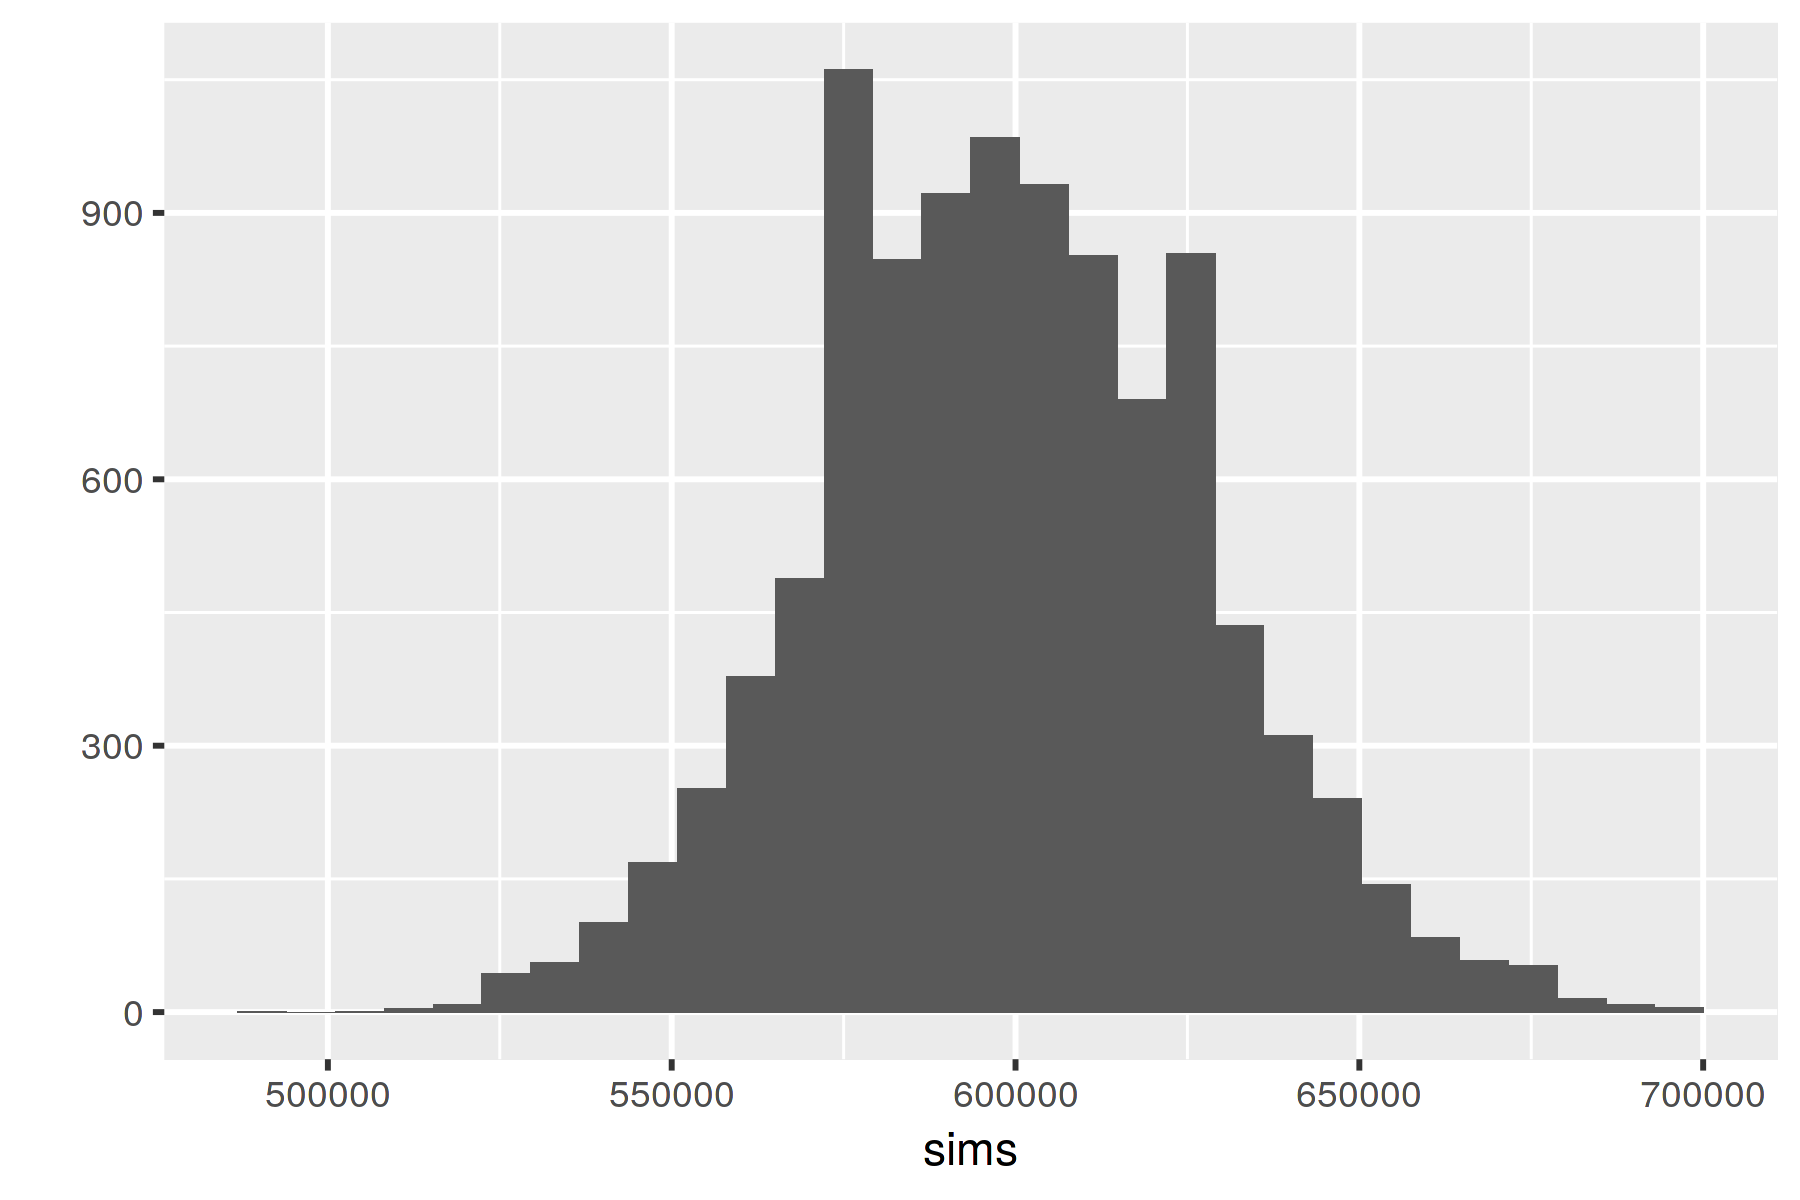

In [151]:
arch <- "den4"
count <- filter(tmrca_df, archaic == arch)$count
total <- filter(tmrca_df, archaic == arch)$total

sims <- (rpois(10000, count) / (total * tafr$mut_rate) + filter(direct_tmrca, dp == 3)$tmrca)

quantile(sims, probs = c(0.025, 0.975))
mean(sims)
qplot(sims)